In [10]:
from qiskit import * ### Importing the library to our notebook
from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider
from qiskit.visualization import plot_histogram
%matplotlib inline

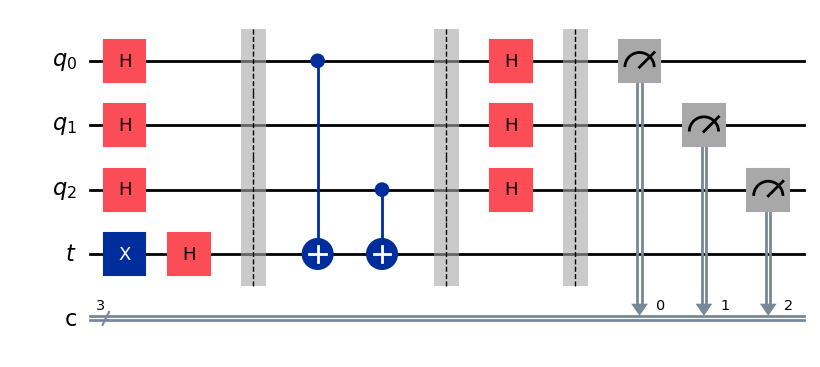

In [8]:
### Deutsch-Jozsa algorithm on f(x1,x2,x3)= x_1\xor x_3

n=3 ### Number of variables in the underlying Boolean function
q = QuantumRegister(n, 'q')
t = QuantumRegister(1, 't')
c = ClassicalRegister(n, 'c') 
qc_dj = QuantumCircuit(q,t,c)
### Initialization
for i in range(n): qc_dj.h(q[i])
qc_dj.x(t) 
qc_dj.h(t)
qc_dj.barrier()
### Oracle for f(x1,x2,x3)=x_1\xor x_3
qc_dj.cx(q[0],t) 
qc_dj.cx(q[2],t)
qc_dj.barrier()
#Final set of Hadamard gates
for i in range(n): qc_dj.h(q[i])
qc_dj.barrier()
#Final Measurement
qc_dj.measure(q,c) 
qc_dj.draw(output='mpl')

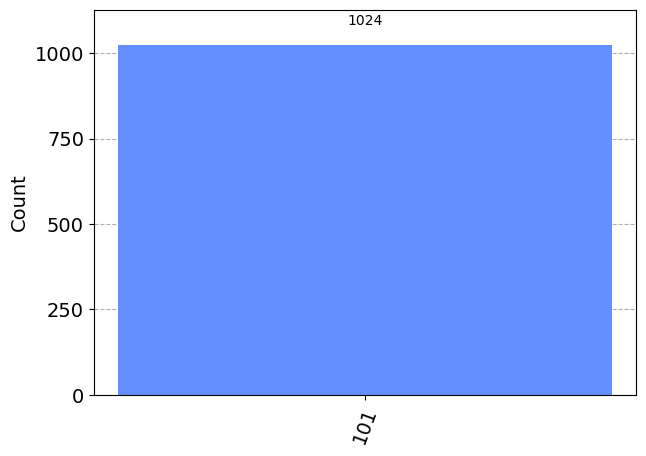

In [11]:
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')
result = simulator.run(qc_dj).result()
plot_histogram(result.get_counts(qc_dj))

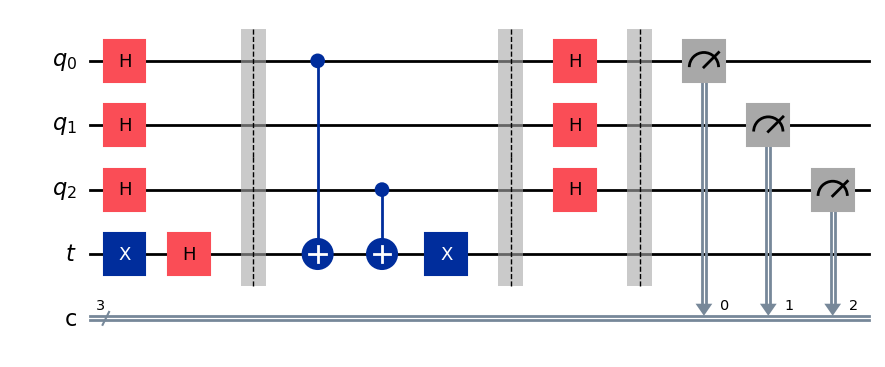

In [12]:
### Deutsch-Jozsa algorithm on f(x1,x2,x3)= x_1\xor x_3

n=3 ### Number of variables in the underlying Boolean function
q = QuantumRegister(n, 'q')
t = QuantumRegister(1, 't')
c = ClassicalRegister(n, 'c') 
qc_dj1 = QuantumCircuit(q,t,c)
### Initialization
for i in range(n): qc_dj1.h(q[i])
qc_dj1.x(t) 
qc_dj1.h(t)
qc_dj1.barrier()
### Oracle for f(x1,x2,x3)=x_1\xor x_3 xor 1
qc_dj1.cx(q[0],t) 
qc_dj1.cx(q[2],t)
qc_dj1.x(t)
qc_dj1.barrier()
#Final set of Hadamard gates
for i in range(n): qc_dj1.h(q[i])
qc_dj1.barrier()
#Final Measurement
qc_dj1.measure(q,c) 
qc_dj1.draw(output='mpl')

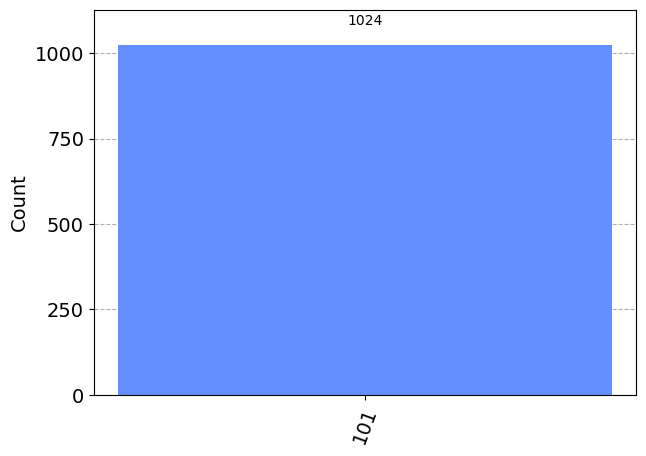

In [13]:
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')
result = simulator.run(qc_dj1).result()
plot_histogram(result.get_counts(qc_dj1))

#we obtained the same graph for both, f = x1 xor x3 and f = x1 xor x3 xor 1. 
#this shows that the DJ algorithm cannot differentiate between a linear function and its complement